In [2]:
#Load some general packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
#import seaborn as sns
import pandas as pd

plt.rcParams
matplotlib.rcdefaults()
plt.rcParams['mathtext.fontset'] = "cm"

In [3]:
path_figures = r"C:\Users\dfernand\OneDrive - UGent\Desktop\ModSim_cursus_2021_2022\Cursus_2022_2023\github\theory\EN_Syllabus-Modelleren-en-Simuleren"

####  This notebook contains the code to reproduce some of the figures in the course notes

## Chapter 2

Logistic growth

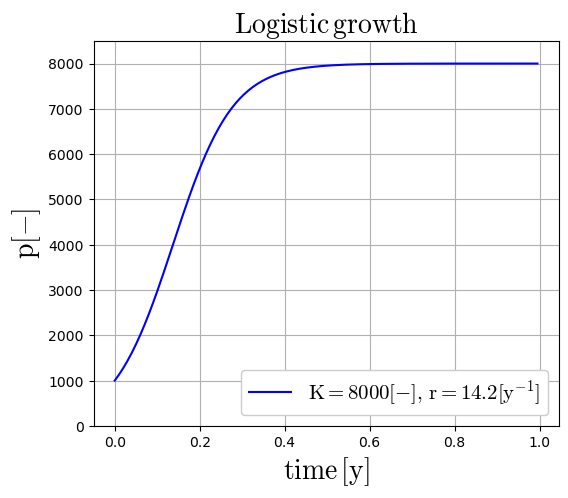

In [9]:
time = np.arange(0,1,0.005) 
K = 8000 # number of p/ecosystem [-]
r = 14.2 # y^-1
p_0 = 1000 # Initial p
logistic_growth =  K/(1+(K-p_0)/p_0*np.exp(-r*time))
fig = plt.figure(figsize=(6,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1 = fig.add_subplot(111) 
plot1 = ax1.plot(time, logistic_growth,'b-',label = r'$\mathrm{K=8000[-],\/r=14.2[y^{-1}]}$') 
ax1.set_xlabel(r'$\mathrm{time\/[y]}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{p [-]}$', fontsize=20)
ax1.set_title(r'$\mathrm{Logistic\/growth}$', fontsize=20)
ax1.set_ylim(0,8500)
plt.grid()
ax1.legend(loc=4,fontsize=15, framealpha=1)
#ax1.minorticks_on()
plt.savefig(os.path.join(path_figures,'HS_2','logisticgrowth.svg'), bbox_inches='tight')
plt.show()

Dummy example for Gaussian distribution

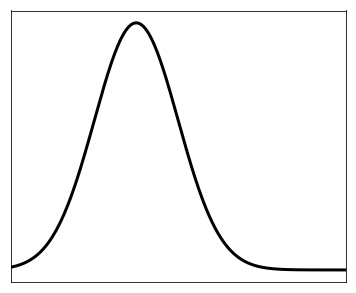

In [4]:
from numpy import random
from scipy import stats
fig = plt.figure(figsize=(6,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)

ax1 = fig.add_subplot(111)
x = np.linspace(-50, 50, 1000)
mu, sigma = 0, 10 # mean and standard deviation
snd = stats.norm(mu, sigma)
s = np.random.normal(mu, sigma, 1000)
plt.plot(x, snd.pdf(x),'k-',linewidth=3.0)
ax1.set_xlim(-30,50)
ax1.set_yticklabels([])
ax1.set_xticklabels([])
plt.xticks([])
plt.yticks([])
plt.show()

Triangle PDF and CDF

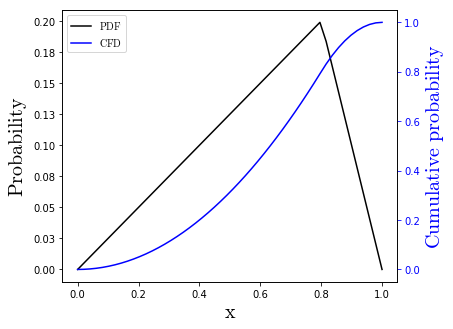

In [5]:
import scipy
from scipy.stats import triang 
from matplotlib.ticker import FormatStrFormatter
    
numargs = triang.numargs 
a = 0.8
rv = triang(a) 
distribution = np.linspace(0, np.minimum(rv.dist.b, 3)) 
fig = plt.figure(figsize=(6,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1 = fig.add_subplot(111) 
plot1 = ax1.plot(distribution, rv.pdf(distribution)/10,'k-',label = r'$\mathrm{PDF}$') 
ax2 = ax1.twinx()
plot2 = ax2.plot(distribution, rv.cdf(distribution),'b-',label = r'$\mathrm{CFD}$') 
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xlabel(r'$\mathrm{x}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{Probability}$', fontsize=20)
ax2.set_ylabel(r'$\mathrm{Cumulative\/\/probability}$', fontsize=20)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
# Same legend
plot = plot1 + plot2
labs = [leg.get_label() for leg in plot]
ax1.legend(plot, labs, loc=2)
plt.savefig(os.path.join(path_figures,'HS_9','triangle_PDF_CDF.svg'), bbox_inches='tight')

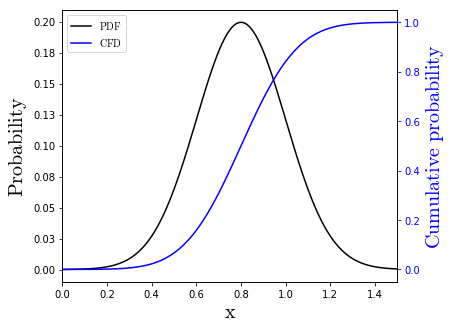

In [6]:
from scipy.stats import norm 
a = 0.8
rv = norm(a,0.2) 

distribution = np.linspace(0, np.minimum(rv.dist.b, 1.5),150) 
fig = plt.figure(figsize=(6,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1 = fig.add_subplot(111) 
plot1 = ax1.plot(distribution, rv.pdf(distribution)/10,'k-',label = r'$\mathrm{PDF}$') 
ax2 = ax1.twinx()
plot2 = ax2.plot(distribution, rv.cdf(distribution),'b-',label = r'$\mathrm{CFD}$') 
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xlabel(r'$\mathrm{x}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{Probability}$', fontsize=20)
ax2.set_ylabel(r'$\mathrm{Cumulative\/\/probability}$', fontsize=20)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
ax1.set_xlim(0,1.5)
# Same legend
plot = plot1 + plot2
labs = [leg.get_label() for leg in plot]
ax1.legend(plot, labs, loc=2)
plt.savefig(os.path.join(path_figures,'HS_9','Gaussian_PDF_CDF.pdf'), bbox_inches='tight')

### Latin Hypercube sampling

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.09444811 0.13730414 0.24176717 0.30258521 0.4606508  0.53104447
 0.69697016 0.73221705 0.80003962 0.93040468]


[]

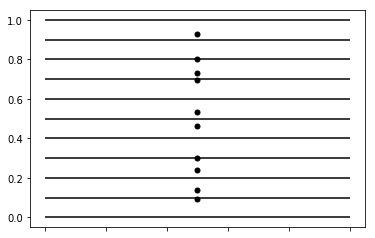

In [7]:
#If we take 10 samples, we divide the cumulative distribution into 10 equal bins; 
#so values 0.1,0.2,... 1.0
nsegments = 10

segments = np.linspace(0,1.,nsegments+1) #explain linspace!
print(segments)
#In each of these segments, we now sample as we would sample in a uniform distribution:
samples=np.zeros(nsegments) #here we will store our sampled values
for i in range(nsegments):
    #uniform between these values
    samples[i]=np.random.uniform(segments[i],segments[i+1],1) 
print(samples)
fig,ax = plt.subplots()
ax.hlines(segments,0.,1.)
ax.plot(0.5*np.ones(nsegments), samples,'ko',markersize=5)
ax.set_xticklabels([])

#### Normal distribution

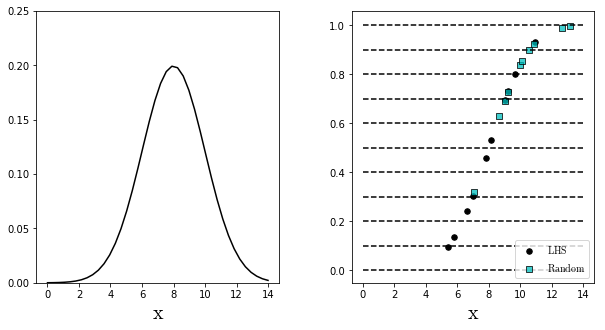

In [8]:
#Let's plot what we actually want to do -> normal distribution!
from scipy.stats import norm  
#other distributions: http://docs.scipy.org/doc/scipy/reference/stats.html

#mean 8 and std 2.
norm_samp =  norm.ppf(samples, 8.,2.) #ppf-function of python-scipy solves the inverse distribution! 
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax = fig.add_subplot(121) 
norm_samp_extra = np.linspace(0,14,num=40)
ax.plot(norm_samp_extra,stats.norm(8, 2).pdf(norm_samp_extra),'k-')
ax.set_ylim(0,0.25)
ax1 = fig.add_subplot(122) 
ax1.scatter(norm_samp,samples,c='k',s=30,label=r'$\mathrm{LHS}$')
#ax1.set_xlim(0,14),ax.set_ylim(0,1)
ax1.hlines(segments,0,14, linestyles='--')
ax.set_xlabel(r'$\mathrm{x}$', fontsize=20,rotation=0)
ax1.set_xlabel(r'$\mathrm{x}$', fontsize=20,rotation=0)
#compare this with a standard random sampling procedure:
standardsam=np.random.uniform(0.,1.,nsegments)
ax1.scatter(norm.ppf(standardsam, 8.,2.),standardsam,c='c',marker='s',s=40, edgecolor='k',alpha=0.75,label=r'$\mathrm{Random}$')
ax1.legend(loc=4)
#plt.savefig(os.path.join(path_figures,'HS_9','LHS.pdf'), bbox_inches='tight')

### Dummy sensitivity functions for linear and quadratic

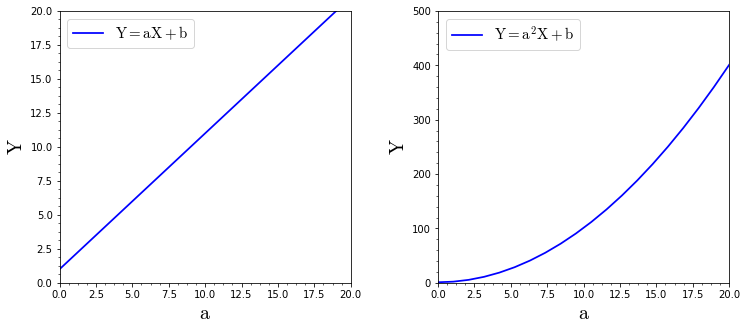

In [9]:
a = np.linspace(0,20,20)
x,b = 1,1
y1 = a*x+b
y2 = a**2*x+b

fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1 = fig.add_subplot(121) 
ax1.plot(a,y1,'b-',label = r'$\mathrm{Y=aX+b}$',linewidth=1.75) 
ax1.set_xlabel(r'$\mathrm{a}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{Y}$', fontsize=20)
ax1.legend(loc=2,fontsize=15)
ax1.set_xlim(0,20)
ax1.set_ylim(0,20)
ax1.minorticks_on()
ax2 = fig.add_subplot(122) 
ax2.plot(a,y2,'b-',label = r'$\mathrm{Y=a^2X+b}$',linewidth=1.75) 
ax2.set_xlabel(r'$\mathrm{a}$', fontsize=20)
ax2.set_ylabel(r'$\mathrm{Y}$', fontsize=20)
ax2.legend(loc=2,fontsize=15)
ax2.set_xlim(0,20)
ax2.set_ylim(0,500)
ax2.minorticks_on()
#plt.savefig(os.path.join(path_figures,'HS_9','localcharlinear.pdf'), bbox_inches='tight')
plt.show()

### Dummy figure for distances between measurements and model predictions

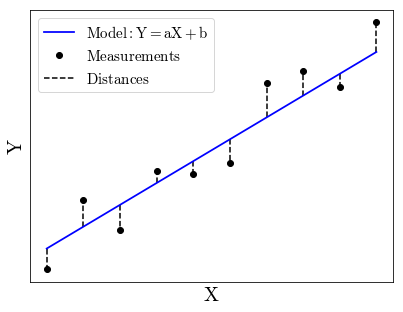

In [12]:
a,b = 1,1
x = np.arange(0,10,1)
y = a*x+b
#noise = np.random.normal(0,1,np.size(x))
# For the exact data
noise = np.array([-0.9560808 ,  1.21500347, -1.12763192,  0.54588546, -0.56972488,
       -1.08054493,  1.5659718 ,  1.13683526, -0.59737273,  1.35469408])
ynoise = a*x+b + noise
dist = y-ynoise

fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)

ax1.plot(x,y,'b-',label = r'$\mathrm{Model:Y=aX+b}$',linewidth=1.75) 
ax1.plot(x,ynoise,'ko',label = r'$\mathrm{Measurements}$',linewidth=1.75)
ax1.vlines(x,y,ynoise, linestyles='--',label=r'$\mathrm{Distances}$')

ax1.set_xlabel(r'$\mathrm{X}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{Y}$', fontsize=20)
ax1.legend(loc=2,fontsize=15)
plt.xticks([], [])
plt.yticks([], [])
#plt.savefig(os.path.join(path_figures,'HS_7','Objectivefunction.pdf'), bbox_inches='tight')
plt.show()

### Chapter 4 First order responses

$$
\tau\dot{y}+y=ku \\
y(s) = \Big(\frac{\tau}{\tau s+1}\Big)^{-1}y_0 + \Big(\frac{\tau}{\tau s+1}\Big)^{-1}u(s)
$$

In [13]:
def impulse(t,tau,k,y_0):
    return np.exp(-t/tau)*y_0 + k/tau*np.exp(-t/tau)

def step(t,tau,k,y_0):
    return np.exp(-t/tau)*y_0 + k*(1-np.exp(-t/tau)) 
    
def ramp(t,tau,k,y_0):
    return np.exp(-t/tau)*y_0 + k*tau*np.exp(-t/tau)+k*(t-tau)

def freq_sine_wave(t,tau,k,a,omega,y_0):
    c1=k*a*omega*tau**2/(tau**2*omega**2+1)
    c2=-k*a*omega*tau/(tau**2*omega**2+1)
    c3=k*a*omega/(tau**2*omega**2+1)
    return np.exp(-t/tau)*y_0 + c1/tau*np.exp(-t/tau)+c2*np.cos(omega*t)+c3/omega*np.sin(omega*t)  

#### Impulse (Dirac delta function)

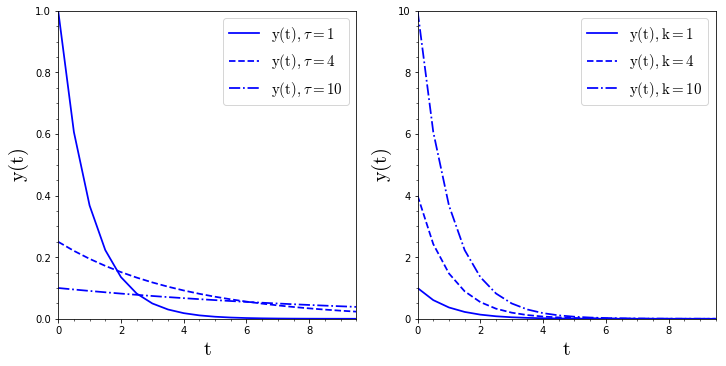

In [15]:
tau = np.array([1,4,10])
k   = np.array([1,4,10])
t   = np.arange(0,10,0.5)
y_0 = 0
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(t,impulse(t,tau[0],k[0],y_0),'b-',label = r'$\mathrm{y(t),\tau=1}$',linewidth=1.75)
ax1.plot(t,impulse(t,tau[1],k[0],y_0),'b--',label = r'$\mathrm{y(t),\tau=4}$',linewidth=1.75) 
ax1.plot(t,impulse(t,tau[2],k[0],y_0),'b-.',label = r'$\mathrm{y(t),\tau=10}$',linewidth=1.75)  
ax1.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{y(t)}$', fontsize=20)
ax1.legend(loc=1,fontsize=15)
ax1.set_xlim(np.min(t),np.max(t))
ax1.set_ylim(0,1)
ax1.minorticks_on()
ax2 = fig.add_subplot(122) 
ax2.plot(t,impulse(t,tau[0],k[0],y_0),'b-',label = r'$\mathrm{y(t),k=1}$',linewidth=1.75)
ax2.plot(t,impulse(t,tau[0],k[1],y_0),'b--',label = r'$\mathrm{y(t),k=4}$',linewidth=1.75) 
ax2.plot(t,impulse(t,tau[0],k[2],y_0),'b-.',label = r'$\mathrm{y(t),k=10}$',linewidth=1.75) 
ax2.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax2.set_ylabel(r'$\mathrm{y(t)}$', fontsize=20)
ax2.legend(loc=1,fontsize=15)
ax2.set_xlim(np.min(t),np.max(t))
ax2.set_ylim(0,10)
ax2.minorticks_on()
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.savefig(os.path.join(path_figures,'HS_3','impulse.pdf'), bbox_inches='tight')
plt.show()

#### Step response

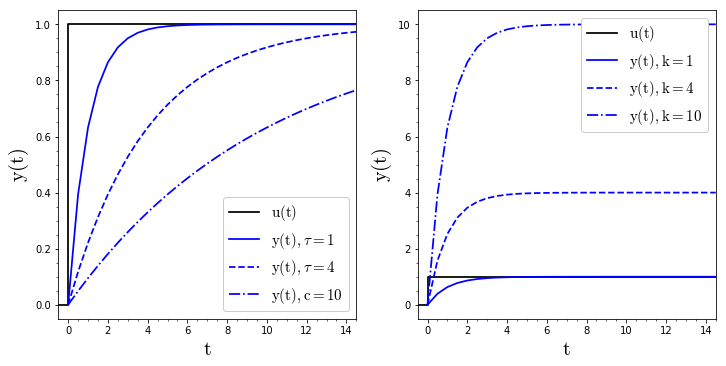

In [17]:
tau = np.array([1,4,10])
k   = np.array([1,4,10])
t   = np.arange(0,15,0.5)
y_0 = 0
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot([-0.5,0,0,np.max(t)],[0,0,1,1],'k-',label = r'$\mathrm{u(t)}$',linewidth=1.75)
ax1.plot(t,step(t,tau[0],k[0],y_0),'b-',label = r'$\mathrm{y(t),\tau=1}$',linewidth=1.75)
ax1.plot(t,step(t,tau[1],k[0],y_0),'b--',label = r'$\mathrm{y(t),\tau=4}$',linewidth=1.75) 
ax1.plot(t,step(t,tau[2],k[0],y_0),'b-.',label = r'$\mathrm{y(t),c=10}$',linewidth=1.75)  
ax1.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{y(t)}$', fontsize=20)
ax1.legend(loc=4,fontsize=15,framealpha=1)
ax1.set_xlim(-0.5,np.max(t))
#ax1.set_ylim(0,1)
ax1.minorticks_on()
ax2 = fig.add_subplot(122) 
ax2.plot([-0.5,0,0,np.max(t)],[0,0,1,1],'k-',label = r'$\mathrm{u(t)}$',linewidth=1.75)
ax2.plot(t,step(t,tau[0],k[0],y_0),'b-',label = r'$\mathrm{y(t),k=1}$',linewidth=1.75)
ax2.plot(t,step(t,tau[0],k[1],y_0),'b--',label = r'$\mathrm{y(t),k=4}$',linewidth=1.75) 
ax2.plot(t,step(t,tau[0],k[2],y_0),'b-.',label = r'$\mathrm{y(t),k=10}$',linewidth=1.75) 
ax2.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax2.set_ylabel(r'$\mathrm{y(t)}$', fontsize=20)
ax2.legend(loc=1,fontsize=15,framealpha=1)
ax2.set_xlim(-0.5,np.max(t))
#ax2.set_ylim(0,10)
ax2.minorticks_on()
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.savefig(os.path.join(path_figures,'HS_3','step.pdf'), bbox_inches='tight')
plt.show()

#### $S_{O_2}$ step response

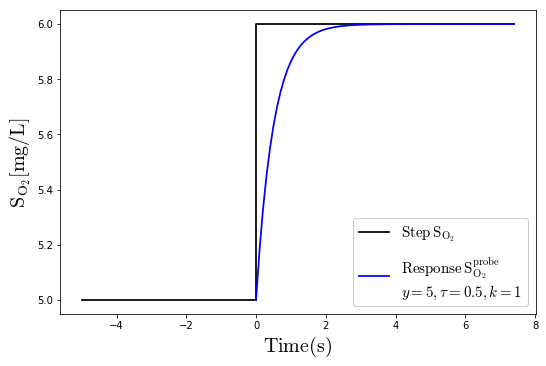

In [83]:
tau = 0.5
k   = 6
t   = np.arange(0,7.5,0.1)
y_0 = 5
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_subplot(111)
ax1.plot([-5,0,0,0,np.max(t)],[5,5,5,6,6],'k-',label = r'$\mathrm{Step\/S_{O_{2}}}$',linewidth=1.75)
ax1.plot(t,step(t,tau,k,y_0),'b-',label =r"$\mathrm{Response\/S^{probe}_{O_{2}}}$" + "\n" + r"$y=5,\tau =0.5,k=1$",linewidth=1.75)
ax1.set_xlabel(r'$\mathrm{Time(s)}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{S_{O_{2}}[mg/L]}$', fontsize=20)
ax1.legend(loc=4,fontsize=15,framealpha=1)
#ax1.set_xlim(-0.5,np.max(t))
#ax1.set_ylim(0,1)
#ax1.minorticks_on()
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.savefig(os.path.join(path_figures,'HS_3','SO2_step.pdf'), bbox_inches='tight')
plt.show()

#### Two first order systems in series

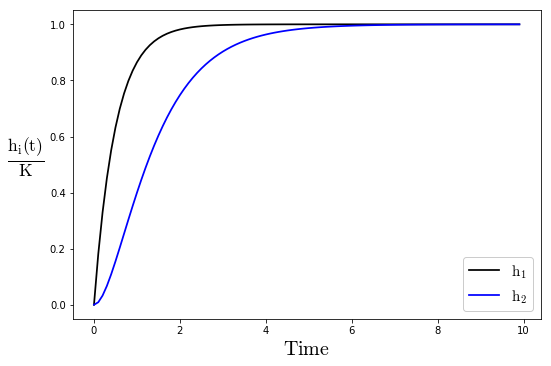

In [93]:
tau1,tau2,k1,k2 = 1,0.5, 1, 1
#K   = k1/k2
t   = np.arange(0,10,0.1)
y_0 = 0
def tank2_solution(t,tau1,tau2,k1,k2):
    return k1*k2*(1-(tau1/(tau1-tau2))*np.exp(-t/tau1)-(tau2/(tau2-tau1))*np.exp(-t/tau2))
fig = plt.figure(figsize=(7.5,5))
ax1 = fig.add_subplot(111)
ax1.plot(t,step(t,tau,k1,y_0)/(k1*k2),'k-',label =r"$\mathrm{h_1}$",linewidth=1.75)
ax1.plot(t,tank2_solution(t,tau1,tau2,k1,k2)/(k1*k2),'b-',label =r"$\mathrm{h_2}$",linewidth=1.75)
ax1.set_xlabel(r'$\mathrm{Time}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{\frac{h_i(t)}{K}}$', fontsize=25,rotation=0)
ax1.yaxis.set_label_coords(-0.1,0.45)
ax1.legend(loc=4,fontsize=15,framealpha=1)
#ax1.set_xlim(-0.5,np.max(t))
#ax1.set_ylim(0,1)
#ax1.minorticks_on()
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.savefig(os.path.join(path_figures,'HS_3','tanks_series.svg'), bbox_inches='tight')
plt.show()

#### Ramp response

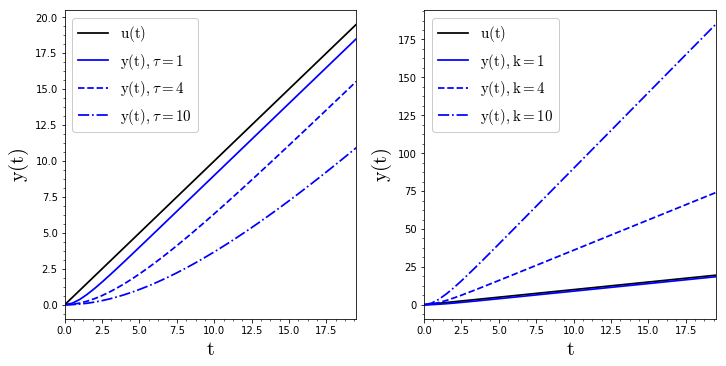

In [61]:
tau = np.array([1,4,10])
k   = np.array([1,4,10])
t   = np.arange(0,20,0.5)
y_0 = 0
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(t,t,'k-',label = r'$\mathrm{u(t)}$',linewidth=1.75)
ax1.plot(t,ramp(t,tau[0],k[0],y_0),'b-',label = r'$\mathrm{y(t),\tau=1}$',linewidth=1.75)
ax1.plot(t,ramp(t,tau[1],k[0],y_0),'b--',label = r'$\mathrm{y(t),\tau=4}$',linewidth=1.75) 
ax1.plot(t,ramp(t,tau[2],k[0],y_0),'b-.',label = r'$\mathrm{y(t),\tau=10}$',linewidth=1.75)  
ax1.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{y(t)}$', fontsize=20)
ax1.legend(loc=2,fontsize=15,framealpha=1)
ax1.set_xlim(0,np.max(t))
#ax1.set_ylim(0,1)
ax1.minorticks_on()
ax2 = fig.add_subplot(122) 
ax2.plot(t,t,'k-',label = r'$\mathrm{u(t)}$',linewidth=1.75)
ax2.plot(t,ramp(t,tau[0],k[0],y_0),'b-',label = r'$\mathrm{y(t),k=1}$',linewidth=1.75)
ax2.plot(t,ramp(t,tau[0],k[1],y_0),'b--',label = r'$\mathrm{y(t),k=4}$',linewidth=1.75) 
ax2.plot(t,ramp(t,tau[0],k[2],y_0),'b-.',label = r'$\mathrm{y(t),k=10}$',linewidth=1.75) 
ax2.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax2.set_ylabel(r'$\mathrm{y(t)}$', fontsize=20)
ax2.legend(loc=2,fontsize=15,framealpha=1)
ax2.set_xlim(0,np.max(t))
#ax2.set_ylim(0,10)
ax2.minorticks_on()
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.savefig(os.path.join(path_figures,'HS_3','ramp.pdf'), bbox_inches='tight')
plt.show()

#### Frequency response

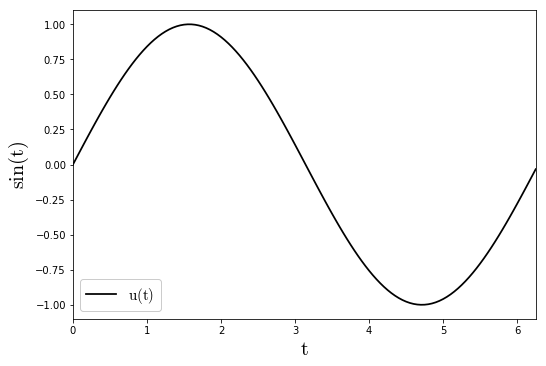

In [17]:
t   = np.arange(0,2*np.pi,0.05)
A,omega = 1,1
fig = plt.figure(figsize=(7.5,5))

ax1 = fig.add_subplot(111)
ax1.plot(t,A*np.sin(omega*t),'k-',label = r'$\mathrm{u(t)}$',linewidth=1.75)
ax1.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{sin(t)}$', fontsize=20)
ax1.legend(loc=3,fontsize=15,framealpha=1)
ax1.set_xlim(0,np.max(t))
#ax1.set_ylim(0,1)
#ax1.minorticks_on()
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
#plt.savefig(os.path.join(path_figures,'HS_3','sine_wave.svg'), bbox_inches='tight')
plt.show()

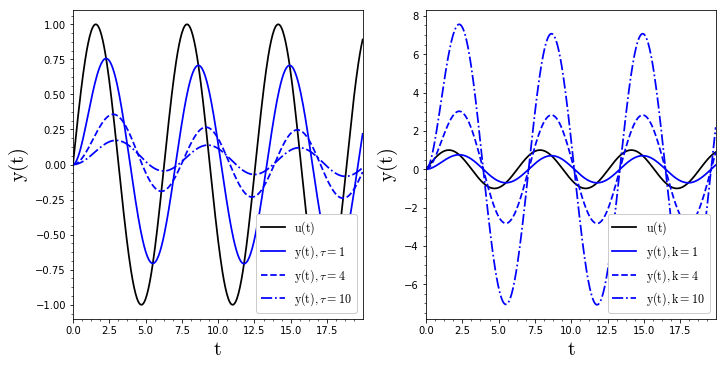

In [60]:
tau = np.array([1,4,10])
k   = np.array([1,4,10])
t   = np.arange(0,20,0.05)
y_0 = 0
a,omega=1,1
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(t,a*np.sin(omega*t),'k-',label = r'$\mathrm{u(t)}$',linewidth=1.75)
ax1.plot(t,freq_sine_wave(t,tau[0],k[0],a,omega,y_0),'b-',label = r'$\mathrm{y(t),\tau=1}$',linewidth=1.75)
ax1.plot(t,freq_sine_wave(t,tau[1],k[0],a,omega,y_0),'b--',label = r'$\mathrm{y(t),\tau=4}$',linewidth=1.75) 
ax1.plot(t,freq_sine_wave(t,tau[2],k[0],a,omega,y_0),'b-.',label = r'$\mathrm{y(t),\tau=10}$',linewidth=1.75)  
ax1.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax1.set_ylabel(r'$\mathrm{y(t)}$', fontsize=20)
ax1.legend(loc=4,fontsize=12,framealpha=1)
ax1.set_xlim(0,np.max(t))
#ax1.set_ylim(0,1)
ax1.minorticks_on()
ax2 = fig.add_subplot(122) 
ax2.plot(t,a*np.sin(omega*t),'k-',label = r'$\mathrm{u(t)}$',linewidth=1.75)
ax2.plot(t,freq_sine_wave(t,tau[0],k[0],a,omega,y_0),'b-',label = r'$\mathrm{y(t),k=1}$',linewidth=1.75)
ax2.plot(t,freq_sine_wave(t,tau[0],k[1],a,omega,y_0),'b--',label = r'$\mathrm{y(t),k=4}$',linewidth=1.75) 
ax2.plot(t,freq_sine_wave(t,tau[0],k[2],a,omega,y_0),'b-.',label = r'$\mathrm{y(t),k=10}$',linewidth=1.75) 
ax2.set_xlabel(r'$\mathrm{t}$', fontsize=20)
ax2.set_ylabel(r'$\mathrm{y(t)}$', fontsize=20)
ax2.legend(loc=4,fontsize=12,framealpha=1)
ax2.set_xlim(0,np.max(t))
#ax2.set_ylim(0,10)
ax2.minorticks_on()
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.savefig(os.path.join(path_figures,'HS_3','freq_sine_wave.pdf'), bbox_inches='tight')
plt.show()